In [79]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objects as go

In [80]:
gov_corruption_df = pd.read_csv('clean data/cpi_2019.csv')
generosity_df = pd.read_csv('clean data/global_generosity_score.csv')
human_freedom_df = pd.read_csv('clean data/hf_score.csv')
life_expectancy_df = pd.read_csv('clean data/lifeexp.csv')
education_df = pd.read_csv('clean data/clean_edu.csv')
gdp_df = pd.read_csv('clean data/Updated_GDP.csv')
happy_df = pd.read_csv('clean data/happy_score.csv')

In [81]:
## Clean up happy score dataframe for merge
happy_df = happy_df.rename(columns={'Country or region':'Country','Score':'Happiness Score'})
#happy_df

In [82]:
## Clean up generosity dataframe for merge
generosity_df = generosity_df.drop('Unnamed: 0',axis=1)
clean_gen_df = generosity_df.rename(columns={'country':'Country','overallScore':'Generosity Score'})
clean_gen_df = clean_gen_df.sort_values('Country')
clean_gen_df = clean_gen_df.reset_index(drop=True)
#clean_gen_df

In [83]:
## Clean up corruption dataframe for merge
clean_corrupt_df = gov_corruption_df.sort_values('Country')
clean_corrupt_df = clean_corrupt_df.reset_index(drop=True)
#clean_corrupt_df

In [84]:
## Clean up gdp dataframe for merge
gdp_df = gdp_df.rename(columns={'Country Name':'Country','Country Code':'Region','2019':'GDP'})
gdp_df = gdp_df[['Country','GDP']]




In [85]:
## Clean up freedom dataframe for merge
human_freedom_df = human_freedom_df.rename(columns={'countries':'Country','region':'Region','hf_score':'Human Freedom Score'})
#human_freedom_df

In [86]:
## Clean up education dataframe for merge
education_df = education_df.rename(columns={'Data Source':'Country','Rate':'Education'})
#education_df

In [87]:
## merge dataframes into final data frame for analysis
merge_1 = pd.merge(clean_corrupt_df,clean_gen_df,how='outer',on='Country')
merge_2 = pd.merge(merge_1,human_freedom_df,how='outer',on='Country')
merge_3 = pd.merge(merge_2,life_expectancy_df,how='outer',on='Country')
merge_4 = pd.merge(merge_3,education_df,how='outer',on='Country')
merge_5 = pd.merge(merge_4,gdp_df,how='outer',on='Country')
final_data_df = pd.merge(merge_5,happy_df,how='outer',on='Country')


In [88]:
## rename dataframe
final_data_df = final_data_df[['Country','Region','Happiness Score','CPI score 2019','Generosity Score',
                               'Human Freedom Score','Life Expectancy','Education','GDP']]
final_data_df = final_data_df.dropna(axis=0,how='any')
final_data_df = final_data_df.reset_index(drop=True)

In [89]:
#final_data_df = final_data_df.style.format({'Happiness Score':'{:.2f}','CPI score 2019':'{:.2f}',
                                            #'Generosity Score':'{:.2f}','Human Freedom Score':'{:.2f}',
                                            #'Life Expectancy':'{:.2f}','Education':'{:.2f}%','GDP':'${:.2f}'})

#final_data_df

In [90]:
summary_df = final_data_df.describe()
summary_df

,Happiness Score,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,5.461057,45.448276,32.091954,7.120115,73.701149,77.467443,15146.553706
std,1.061818,17.527227,9.276918,0.952594,6.842115,25.779375,21303.530556
min,3.334000,20.000000,16.000000,5.290000,59.600000,15.502936,411.552340
25%,4.546500,32.000000,24.500000,6.495000,68.650000,57.927331,1661.283131
50%,5.432000,41.000000,30.000000,7.040000,75.000000,88.852774,6183.823825
75%,6.202500,56.000000,39.000000,7.925000,79.300000,96.859083,18705.715318
max,7.769000,87.000000,58.000000,8.820000,83.400000,111.001115,114704.594171


In [91]:
region_group_df = final_data_df.groupby('Region').mean()
region_group_df

,Happiness Score,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP
Region,,,,,,,
AME,6.203083,38.166667,32.750000,7.334167,76.891667,78.590721,8498.671385
AP,5.090769,38.692308,37.692308,6.658462,72.546154,80.321382,8433.064484
ECA,5.106200,38.100000,23.900000,7.034000,74.180000,97.457719,5679.354542
MENA,5.819000,52.666667,32.166667,6.356667,76.816667,81.963644,20127.040384
SSA,4.298773,34.318182,31.363636,6.319545,64.345455,45.198637,1593.192747
WE/EU,6.414417,64.208333,32.791667,8.223750,80.329167,95.486326,37230.427056


In [92]:
## Regresion Models

# Happiness Score vs. Corruption

y = final_data_df['Happiness Score']
x = final_data_df[['CPI score 2019','Generosity Score','Human Freedom Score','Life Expectancy','Education','GDP']]

regr = linear_model.LinearRegression()
regr.fit(x,y)

#plt.scatter(x,y)

#(s,i,r,p,std) = st.linregress(x,y)
#lin_eq1 = (s*x)+i

#equ = f'y={round(s,2)}x+{round(i,2)}'

print(regr.coef_)

#plt.plot(x,lin_eq1,color='red')
#plt.annotate(equ,(60,4),color='red',fontsize=20)


#plt.show()

[-1.52572702e-03  1.41423732e-02  4.22162300e-02  7.87002326e-02
  1.23326976e-03  1.65013366e-05]


In [93]:
## Happiness Score top 10 countries

happy_sort = final_data_df.sort_values('Happiness Score',ascending=False)
happy_sort = happy_sort.reset_index(drop=True)
top_10 = happy_sort.head(10)
#top_10

## Bottom 10 countries

bottom_10 = happy_sort.tail(10)
#bottom_10

In [94]:
plt.style.use('seaborn-bright')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


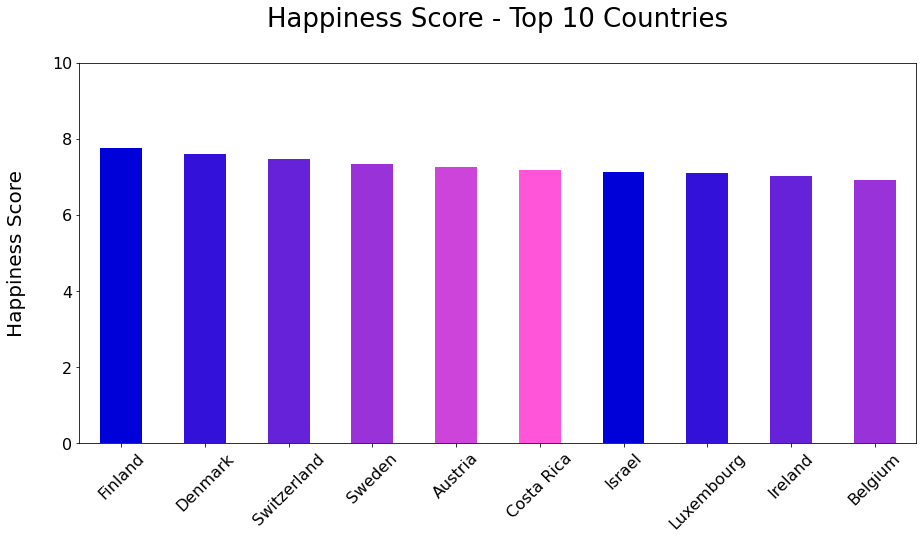

In [95]:
## Plot Top 10 countries


my_colors = [(x/5.0, x/15.0, 0.85) for x in range(len(region_group_df))]

top_10_graph = top_10.plot.bar(x='Country',y='Happiness Score',figsize=(15,7),color=my_colors,rot=45,
                              legend=False,xlabel='')

plt.title('Happiness Score - Top 10 Countries\n',fontsize=26)
#plt.xlabel(fontsize=20)
plt.ylabel('Happiness Score\n', fontsize=20,color='black')
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')
plt.ylim(0,10)

plt.show()

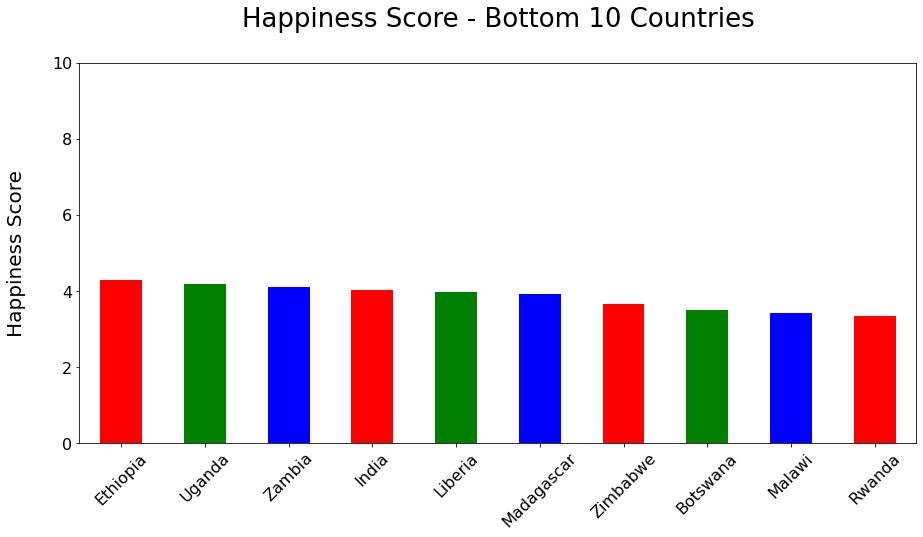

In [96]:
## Bottom 10 graph

#my_colors = [(x/5.0, x/15.0, 0.85) for x in range(len(bottom_10['Country']))]

bottom_10_graph = bottom_10.plot.bar(x='Country',y='Happiness Score',figsize=(15,7),color=['red','green','blue'],rot=45,
                              legend=False,xlabel='')

plt.title('Happiness Score - Bottom 10 Countries\n',fontsize=26)
#plt.xlabel(fontsize=20)
plt.ylabel('Happiness Score\n', fontsize=20,color='black')
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')
plt.ylim(0,10)

plt.show()

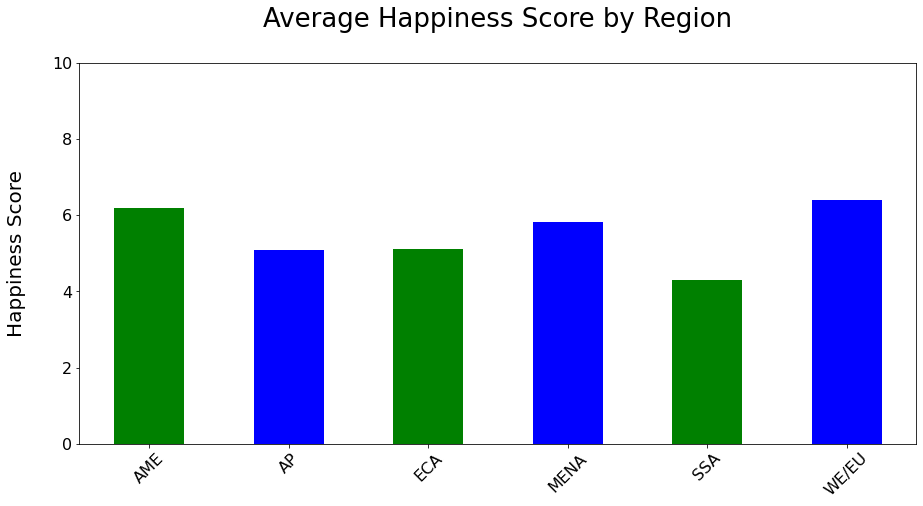

In [97]:
plt.style.use('seaborn-deep')


region_graph = region_group_df.plot.bar(y='Happiness Score',figsize=(15,7),
                                        color=['green','blue'],rot=45,legend=False,xlabel='')

plt.title('Average Happiness Score by Region\n',fontsize=26)
#plt.xlabel(fontsize=20)
plt.ylabel('Happiness Score\n', fontsize=20,color='black')
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')
plt.ylim(0,10)
plt.show()


<AxesSubplot:title={'center':'High GDP'}, ylabel='GDP'>

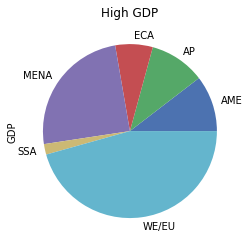

In [98]:
region_group_df.groupby('Region')['GDP'].agg(lambda x: sum(x)).plot(kind='pie',title='High GDP')

In [99]:
#region_group_df = px.data.gapminder().query("GDP").query ("Region == ''")
#fig = px.pie(region_group_df, values='GDP', names='Region',
#             title='Population of American continent',
#             hover_data=['lifeExp'], labels={'lifeExp':'Life Expectancy'})
#fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.show()

In [103]:
labels = ['AME','AP','ECA','MENA','SSA','WE/EU']
values = ['Happiness Score','CPI score 2019','Generosity Score','Human Freedom Score','Life Expectancy','Education','GDP']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()